<a href="https://colab.research.google.com/github/iclalaca/heart-disease-analysis/blob/main/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving heart.csv to heart.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df=pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
df.index

RangeIndex(start=0, stop=918, step=1)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [ ]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [ ]:
check_df(df)

##################### Shape #####################
(918, 12)
##################### Types #####################
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object
##################### Head #####################
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST

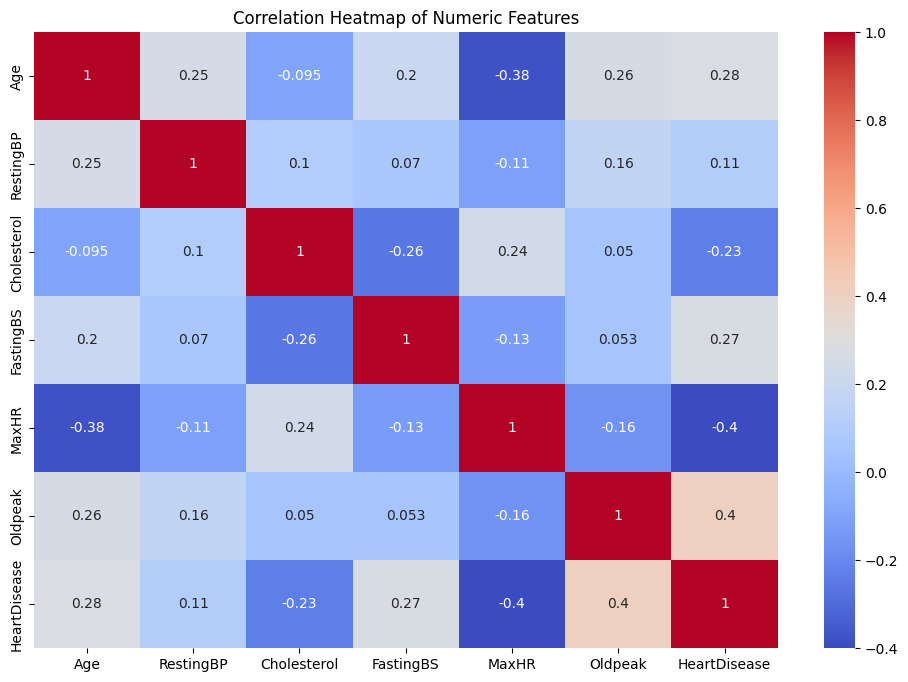

In [ ]:
# Select only numeric columns for correlation calculation
df_numeric = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [ ]:
# Convert values that are 0 to NaN
df["Cholesterol"].replace(0, np.nan, inplace=True)
df["RestingBP"].replace(0, np.nan, inplace=True)

/tmp/ipython-input-14-2449505082.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Cholesterol"].replace(0, np.nan, inplace=True)
/tmp/ipython-input-14-2449505082.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [ ]:
# Calculate medians
chol_median = df["Cholesterol"].median()
bp_median = df["RestingBP"].median()

In [ ]:
# Fill NaN's with median
df["Cholesterol"].fillna(chol_median, inplace=True)
df["RestingBP"].fillna(bp_median, inplace=True)

In [ ]:
print(df[["Cholesterol", "RestingBP"]].isna().sum()) #it must be 0
print(df[["Cholesterol", "RestingBP"]].describe())

Cholesterol    0
RestingBP      0
dtype: int64
       Cholesterol   RestingBP
count   918.000000  918.000000
mean    243.204793  132.538126
std      53.401297   17.990127
min      85.000000   80.000000
25%     214.000000  120.000000
50%     237.000000  130.000000
75%     267.000000  140.000000
max     603.000000  200.000000


In [ ]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    Q1= df[col].quantile(0.25)
    Q3= df[col].quantile(0.75)
    IQR= Q3-Q1
    lower_bound= Q1-1.5*IQR
    upper_bound= Q3+1.5*IQR

    df= df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [ ]:
X=df.drop("HeartDisease", axis=1) # Features (input)
y=df["HeartDisease"] # Target (out)

In [ ]:
X=pd.get_dummies(X, drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
knn_params = {
    "n_neighbors": list(range(1, 20)),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}

grid_knn = GridSearchCV(
    KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy')

grid_knn.fit(X_train, y_train)

print(grid_knn.best_params_)

{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}


In [ ]:
best_params=grid_knn.best_params_
knn_best=KNeighborsClassifier(**best_params)
knn_best.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=15, weights='distance')

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_knn = knn_best.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

Accuracy: 0.7131782945736435
              precision    recall  f1-score   support

           0       0.75      0.74      0.74        72
           1       0.67      0.68      0.68        57

    accuracy                           0.71       129
   macro avg       0.71      0.71      0.71       129
weighted avg       0.71      0.71      0.71       129

Confusion Matrix:
 [[53 19]
 [18 39]]


<Axes: >

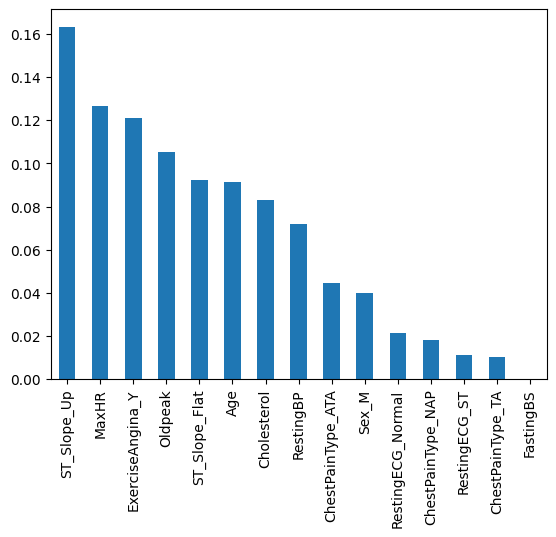

In [ ]:
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind="bar")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_model=RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)  # Train the model

y_pred_rf = rf_model.predict(X_test)  # Make predictions on the test set

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.8604651162790697
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        72
           1       0.84      0.84      0.84        57

    accuracy                           0.86       129
   macro avg       0.86      0.86      0.86       129
weighted avg       0.86      0.86      0.86       129

Random Forest Confusion Matrix:
 [[63  9]
 [ 9 48]]


In [ ]:
accuracy_knn=accuracy_score(y_test, y_pred_knn)
accuracy_rf=accuracy_score(y_test, y_pred_rf)

comparison_df = pd.DataFrame({
    'Model': ['KNN', 'Random Forest'],
    'Accuracy': [accuracy_knn, accuracy_rf]
})

print(comparison_df)

           Model  Accuracy
0            KNN  0.713178
1  Random Forest  0.860465


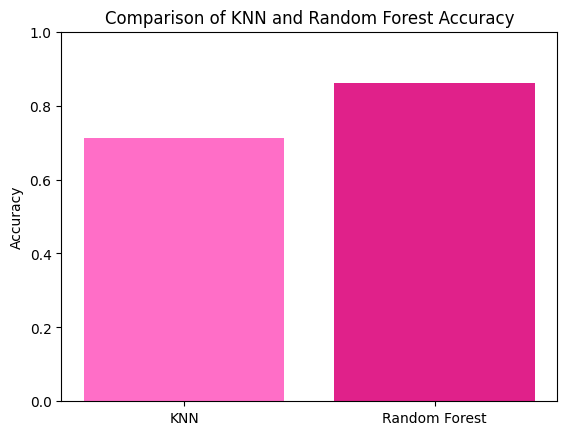

In [ ]:
plt.bar(comparison_df['Model'], comparison_df['Accuracy'], color=["#FF6EC7", "#E0218A"])
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.title('Comparison of KNN and Random Forest Accuracy')
plt.show()